In [ ]:
!pip install ucimlrepo

# 1.0 Import Data

Dataset: https://archive.ics.uci.edu/dataset/186/wine+quality

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine_quality = fetch_ucirepo(id=186)

# data (as pandas dataframes)
X_raw = wine_quality.data.features
y_raw = wine_quality.data.targets

# metadata
print(wine_quality.metadata)

# variable information
print(wine_quality.variables)


{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'ID': 252, 'type': 'NATIVE', 'title': 'Modeling wine preferences

In [ ]:
full_data = pd.concat([X_raw, y_raw], axis=1)

In [ ]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


In [ ]:
# Check if there are duplicates
full_data.duplicated().sum()

1179

In [ ]:
full_data.drop_duplicates(inplace=True)

In [ ]:
full_data.shape

(5318, 12)

<Axes: xlabel='quality', ylabel='Count'>

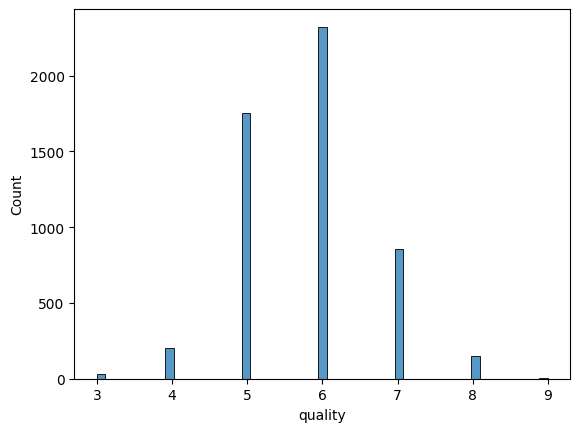

In [ ]:
# plot the histogram of y
sns.histplot(full_data['quality'])

In [ ]:
# Average of quality
full_data['quality'].mean()

5.795599849567506

# 2.0 Dataset Preprocessing

We are splitting the dataset into 3 sets, including:

- Validation: 15% (model never seen it);
- Test: 15%;
- Train: 70%.

In [ ]:
# Randomly take 15% of the dataset as validation set, seeding: 27
validation_data = full_data.sample(frac=0.15, random_state=27)
train_test_data = full_data.drop(validation_data.index)

In [ ]:
X_val = validation_data.drop('quality', axis=1)
y_val = validation_data['quality']

In [ ]:
# Take the dataset's quality column as y, the rest as X
y = train_test_data['quality']
X = train_test_data.drop('quality', axis=1)

print(f'Feature train_test shape: {X.shape}')
print(f'Label train_test shape: {y.shape}')

Feature train_test shape: (4520, 11)
Label train_test shape: (4520,)


In [ ]:
from sklearn.model_selection import train_test_split
# Train test split of the data using train_test_split function, with a ratio of 8:2
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=27, test_size=0.3)

----------

Please start from here:

As coded above, X_val y_val are validation set. Please do not use it until the end when validate the model to check the accuracy.

For training, X_train, X_test, y_train, y_test are defined for model training.

Before next meeting on Saturday:

1. Zhanyang: Ensemble Models: XGBoost, LightGBM, Random Forest etc.
(I don't think ResNet is suitable for non-image tasks. If the non-image data is converted to a regular matrix to fit with Resnet, it is very identical to a CNN model)
2. Dylan: Neural Networks, logistic regression
3. Eric: JTT
4. Reza: SVM

Everyone:

Look for libraries for
**Forgettability Score**
to finding instances that is unforgettable and forgettable.





#3.0 Modeling

### 3.1 ResNet

ResNet is usually used for image classification tasks. Here, we implemented a similified version of ResNet compared to the original architecture, similar to what is described in the Gorishniy, et al., 2020.

In [ ]:
# Remove the quality 9 from the full_data
#full_data_adj = full_data[full_data['quality'] != 9]

# Randomly take 15% of the dataset as validation set, seeding: 27
#validation_data = full_data_adj.sample(frac=0.15, random_state=27)
#train_test_data = full_data_adj.drop(validation_data.index)


#X_val = validation_data.drop('quality', axis=1)
#y_val = validation_data['quality']

# Take the dataset's quality column as y, the rest as X
#y = train_test_data['quality']#
#X = train_test_data.drop('quality', axis=1)



#print(f'Feature train_test shape: {X.shape}')
#print(f'Label train_test shape: {y.shape}')

#from sklearn.model_selection import train_test_split
# Train test split of the data using train_test_split function, with a ratio of 8:2
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=27, test_size=0.3)

In [ ]:
# check the number of labels
y_val.value_counts().reset_index().sort_values(by='quality')

,quality,count
5,3,4
3,4,31
1,5,264
0,6,337
2,7,135
4,8,26
6,9,1


In [ ]:
# Normalize labels to zero-based
y_train_res = y_train - y_train.min()
y_test_res = y_test - y_test.min()
y_val_res = y_val - y_val.min()

y_train_res.max()

6

In [ ]:
!pip install tensorflow

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, Input, regularizers
from tensorflow.keras.regularizers import l2

In [ ]:
class ResNetBlock(tf.keras.layers.Layer):
    def __init__(self, input_dim, hidden_dim, dropout_prob=0.3):
        super(ResNetBlock, self).__init__()
        self.batch_norm = layers.BatchNormalization()
        self.dense1 = layers.Dense(hidden_dim,
                                 kernel_regularizer=regularizers.l2(l2_lambda))
        self.relu = layers.ReLU()
        self.dropout1 = layers.Dropout(dropout_prob)
        self.dense2 = layers.Dense(input_dim,
                                 kernel_regularizer=regularizers.l2(l2_lambda))
        self.dropout2 = layers.Dropout(dropout_prob)

    def call(self, inputs, training=False):
        residual = inputs
        x = self.batch_norm(inputs, training=training)
        x = self.dense1(x)
        x = self.relu(x)
        x = self.dropout1(x, training=training)
        x = self.dense2(x)
        x = self.dropout2(x, training=training)
        return x + residual

class PredictionBlock(tf.keras.layers.Layer):
    def __init__(self, input_dim, output_dim):
        super(PredictionBlock, self).__init__()
        # Layer sequence according to formula:
        # BatchNorm -> ReLU -> Linear
        self.batch_norm = layers.BatchNormalization()
        self.relu = layers.ReLU()
        self.dense = layers.Dense(output_dim)

    def call(self, inputs, training=False):
        # Implement exact formula:
        # Linear(ReLU(BatchNorm(x)))
        x = self.batch_norm(inputs, training=training)
        x = self.relu(x)
        return self.dense(x)

class ResNetForTabular(tf.keras.Model):
    def __init__(self, input_dim, hidden_dim, output_dim, num_blocks, dropout_prob=0.5):
        super(ResNetForTabular, self).__init__()
        self.input_layer = layers.Dense(hidden_dim)
        self.res_blocks = [ResNetBlock(hidden_dim, hidden_dim, dropout_prob)
                          for _ in range(num_blocks)]
        self.prediction_block = PredictionBlock(hidden_dim, output_dim)

    def call(self, inputs, training=False):
        x = self.input_layer(inputs)
        for block in self.res_blocks:
            x = block(x, training=training)
        return self.prediction_block(x, training=training)


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
X_train_res = scaler.fit_transform(X_train)
X_test_res = scaler.transform(X_test)
X_val_res = scaler.transform(X_val)

In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the training dataset
smote = SMOTE(k_neighbors = 3, random_state=42)  # Initialize SMOTE
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_res, y_train_res)

y_train_balanced.min()

0

In [ ]:
# Parameters with modifications
input_dim = 11
hidden_dim = 256  # Reduced complexity
output_dim = 7
num_blocks = 2   # Reduced number of blocks
dropout_prob = 0.3  # Increased dropout
l2_lambda = 0  # L2 regularization

# Instantiate the model
model = ResNetForTabular(input_dim, hidden_dim, output_dim, num_blocks, dropout_prob)

# Learning rate schedule
initial_learning_rate = 0.001
decay_steps = 1000
decay_rate = 0.9
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps, decay_rate
)

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)


# Training with validation
history = model.fit(
    X_train_balanced, y_train_balanced,
    epochs=20,
    batch_size=40,
    validation_data=(X_test_res, y_test_res),
    shuffle=True
)

Epoch 1/20
245/245 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.4585 - loss: 1.3918 - val_accuracy: 0.3422 - val_loss: 1.5431
Epoch 2/20
245/245 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6088 - loss: 0.9728 - val_accuracy: 0.3289 - val_loss: 1.5675
Epoch 3/20
245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6233 - loss: 0.9115 - val_accuracy: 0.3481 - val_loss: 1.5352
Epoch 4/20
245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6558 - loss: 0.8746 - val_accuracy: 0.3695 - val_loss: 1.4882
Epoch 5/20
245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6710 - loss: 0.8139 - val_accuracy: 0.3916 - val_loss: 1.4757
Epoch 6/20
245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6821 - loss: 0.7887 - val_accuracy: 0.3355 - val_loss: 1.5605
Epoch 7/20
245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6799 - loss: 0.7679 - val_accuracy: 0.3673 - val_loss: 1.4964
Epoch 8/20
245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6907 - loss: 0.7549 - val_accuracy: 0

In [ ]:
# Validation dataset prediction accuracy
y_val_pred = model.predict(X_val_res)
y_val_pred_classes = np.argmax(y_val_pred, axis=1)

accuracy = np.mean(y_val_pred_classes == y_val_res)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step
Validation Accuracy: 38.72%


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


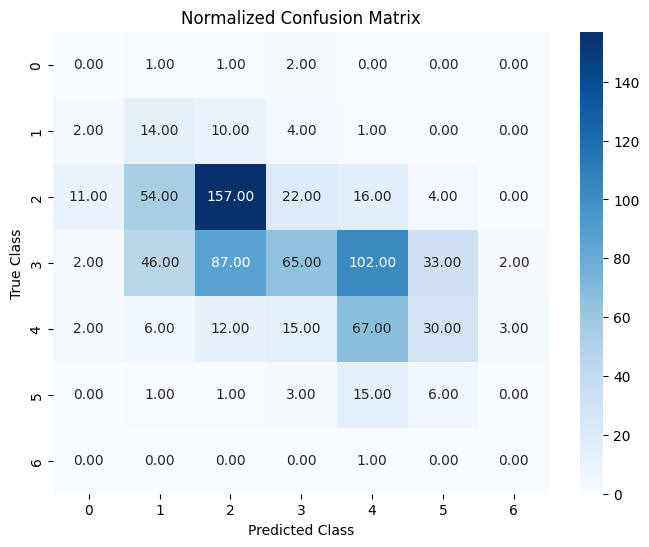

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred_res = model.predict(X_val_res)
y_pred_classes = np.argmax(y_pred_res, axis=1)

cm = confusion_matrix(y_val_res, y_pred_classes)

# Normalize confusion matrix for better interpretability
#cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='.2f', xticklabels=np.unique(y_val_res), yticklabels=np.unique(y_val_res))

plt.title('Normalized Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

In [ ]:
# Rename the model as model_full_data
model_full_data = model

Here, we are implementing Shapley values for the model to check the feature importance.

### 3.2 Finding unforgettable examples

In [ ]:
# Parameters with modifications
input_dim = 11
hidden_dim = 256  # Reduced complexity
output_dim = 7
num_blocks = 2   # Reduced number of blocks
dropout_prob = 0.3  # Increased dropout
l2_lambda = 0  # L2 regularization
epochs = 10

# Instantiate the model
model = ResNetForTabular(input_dim, hidden_dim, output_dim, num_blocks, dropout_prob)

# Learning rate schedule
initial_learning_rate = 0.001
decay_steps = 1000
decay_rate = 0.9
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps, decay_rate
)

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

num_examples = X_train_res.shape[0]
correctness_history = np.zeros((num_examples, epochs), dtype=bool)  # Correctness tracking

batch_size = 120  # Minibatch size

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# Training loop
for epoch in range(epochs):
    print(f"Epoch {epoch + 1}/{epochs}")

    # Train the model for one epoch
    model.fit(
        X_train_res, y_train_res,
        epochs=1,  # Train one epoch at a time
        batch_size=batch_size,
        shuffle=True,
        verbose=1
    )

    # Predict on the full training data to calculate correctness
    y_pred_logits = model.predict(X_train_res, batch_size=batch_size, verbose=0)
    y_pred_labels = np.argmax(y_pred_logits, axis=1)  # Convert logits to class predictions

    # Compare predictions with true labels to determine correctness
    correct = (y_pred_labels == y_train_res)  # Boolean array: True if correct, False otherwise
    correctness_history[:, epoch] = correct  # Store correctness for this epoch

# Calculate forgetting events
forgetting_events = np.sum(
    (correctness_history[:, 1:] < correctness_history[:, :-1]), axis=1
)

# Identify the most forgettable examples
most_forgettable_indices = np.argsort(forgetting_events)[::-1]
most_forgettable_counts = forgetting_events[most_forgettable_indices]

# Print the results
print("Most forgettable examples (top 10):")
for rank, index in enumerate(most_forgettable_indices[:10]):
    print(f"Rank {rank + 1}: Example {index} with forgetting count {most_forgettable_counts[rank]}")

Epoch 1/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 21s 232ms/step - accuracy: 0.3363 - loss: 1.7224
Epoch 2/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5270 - loss: 1.1514
Epoch 3/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5371 - loss: 1.1131
Epoch 4/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5223 - loss: 1.0827
Epoch 5/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5434 - loss: 1.0693
Epoch 6/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5380 - loss: 1.0687
Epoch 7/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5397 - loss: 1.0533
Epoch 8/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5541 - loss: 1.0432
Epoch 9/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5589 - loss: 1.0188
Epoch 10/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5718 - loss: 1.0104
Most forgettable examples (top 10):
Rank 1: Example 2646 with forgetting count 4
Rank 2: Example 2676 with forgetting count 4
Rank 3: Example 102 with forge

In [ ]:
X_train_res

array([[-0.45851614,  1.340957  , -2.04976792, ...,  0.95206987,
         0.99407858, -0.8937154 ],
       [-0.0863871 , -0.73619367, -0.00209255, ...,  0.89104173,
        -1.00586406, -0.8092166 ],
       [-0.16081291, -0.55815218, -0.00209255, ...,  0.15870403,
        -0.23169271, -0.13322625],
       ...,
       [-0.30966452, -0.85488799, -0.47988347, ..., -0.81774624,
         0.0263644 ,  0.20476892],
       [-0.30966452, -1.21097096,  0.20267499, ..., -0.93980252,
         1.18762142,  0.4582653 ],
       [-0.53294195, -0.14272205,  0.88523345, ..., -0.14643668,
         1.05859286,  1.810246  ]])

In [ ]:
# Import defaultdict
from collections import defaultdict

# This part is to keep the categories that only have a few as otherwise they get thrown out
class_indices = defaultdict(list)
for idx, label in enumerate(y_train_res):
    class_indices[label].append(idx)

# Calculate the number of examples to keep per class
reduction_factor = 0.7  # Keep 70% of data
num_examples_to_keep_per_class = {}
for label, indices in class_indices.items():
    num_examples = len(indices)
    num_to_keep = max(1, int(num_examples * reduction_factor))  # Ensure at least one example is kept
    num_examples_to_keep_per_class[label] = num_to_keep

# Select examples to keep per class
indices_to_keep = []
for label, indices in class_indices.items():
    # Get forgetting scores or EL2N scores for the current class
    class_scores = forgetting_events[indices]  # or el2n_scores[indices]
    # Rank indices within the class
    sorted_class_indices = [indices[i] for i in np.argsort(class_scores)]
    # Select top examples to keep
    indices_to_keep.extend(sorted_class_indices[-num_examples_to_keep_per_class[label]:])



X_train_reduced = pd.DataFrame(X_train_res).reset_index().loc[indices_to_keep].drop(columns="index")
y_train_reduced = pd.DataFrame(y_train_res).reset_index().loc[indices_to_keep].drop(columns="index")


<Axes: ylabel='Count'>

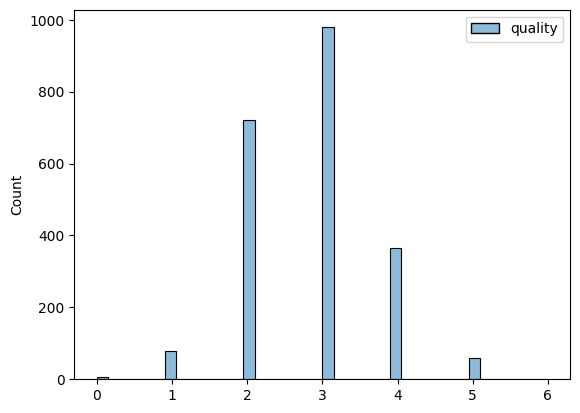

In [ ]:
sns.histplot(y_train_reduced)

In [ ]:
# convert X_train_reduced to a tensorflow tensor
X_train_res_reduced = tf.convert_to_tensor(X_train_reduced, dtype=tf.float32)
y_train_res_reduced = tf.convert_to_tensor(y_train_reduced, dtype=tf.float32)

In [ ]:
# Parameters with modifications
input_dim = 11
hidden_dim = 256  # Reduced complexity
output_dim = 7
num_blocks = 2   # Reduced number of blocks
dropout_prob = 0.3  # Increased dropout
l2_lambda = 0  # L2 regularization

# Instantiate the model
model = ResNetForTabular(input_dim, hidden_dim, output_dim, num_blocks, dropout_prob)

# Learning rate schedule
initial_learning_rate = 0.001
decay_steps = 1000
decay_rate = 0.9
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps, decay_rate
)

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)


# Training with validation
history = model.fit(
    X_train_res_reduced, y_train_res_reduced,
    epochs=20,
    batch_size=40,
    validation_data=(X_test_res, y_test_res),
    shuffle=True
)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 11s 81ms/step - accuracy: 0.3102 - loss: 1.8792 - val_accuracy: 0.4513 - val_loss: 1.3384
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4924 - loss: 1.1421 - val_accuracy: 0.4771 - val_loss: 1.2366
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4979 - loss: 1.1344 - val_accuracy: 0.5229 - val_loss: 1.1525
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5171 - loss: 1.0921 - val_accuracy: 0.5155 - val_loss: 1.1305
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5477 - loss: 1.0536 - val_accuracy: 0.4963 - val_loss: 1.1474
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4996 - loss: 1.0938 - val_accuracy: 0.5214 - val_loss: 1.1330
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5466 - loss: 1.0338 - val_accuracy: 0.4904 - val_loss: 1.1443
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5370 - loss: 1.0239 - val_accuracy: 0.5155 - val_los

In [ ]:
# Validation dataset prediction accuracy
y_val_pred = model.predict(X_val_res)
y_val_pred_classes = np.argmax(y_val_pred, axis=1)

accuracy = np.mean(y_val_pred_classes == y_val_res)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Validation Accuracy: 54.01%


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


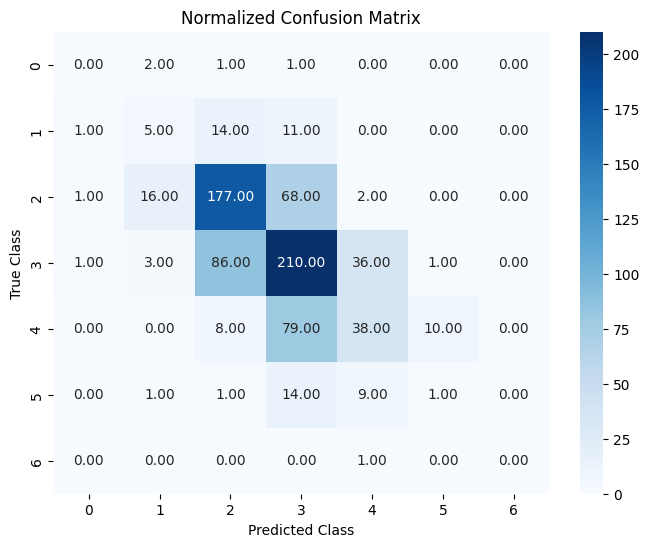

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred_res = model.predict(X_val_res)
y_pred_classes = np.argmax(y_pred_res, axis=1)

cm = confusion_matrix(y_val_res, y_pred_classes)

# Normalize confusion matrix for better interpretability
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='.2f', xticklabels=np.unique(y_val_res), yticklabels=np.unique(y_val_res))

plt.title('Normalized Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

In [ ]:
model_reduced = model

In [ ]:
import shap

# Generate SHAP summary data (e.g., from X_train or X_test)
X_background = shap.sample(X_train_res, 50)

# Convert SHAP DenseData to a NumPy array
if isinstance(X_background, shap.utils._legacy.DenseData):
    X_background = X_background.data

# Ensure the converted data is a NumPy array
X_background = np.array(X_background)

explainer_original = shap.KernelExplainer(model_full_data.predict, X_background)

explainer_reduced = shap.KernelExplainer(model_reduced.predict, X_background)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


In [ ]:
# For SHAP, data needs to be in numpy arrays
X_train_original_np = X_train_res
X_train_reduced_np = X_train_res_reduced.numpy()

In [ ]:
# Choose random 10 examples from the X_test_res
random_indices = np.random.choice(X_test_res.shape[0], size=50, replace=False)
X_test_summary = X_test_res[random_indices]
y_test_summary = y_test_res.to_numpy()[random_indices]


# Compute SHAP values
shap_values_original = explainer_original.shap_values(X_test_summary)
shap_values_reduced = explainer_reduced.shap_values(X_test_summary)

  0%|          | 0/50 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s

  0%|          | 0/50 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s

In [ ]:
# Use advanced indexing to extract values
reshape_original = shap_values_original[np.arange(shap_values_original.shape[0])[:, None], np.arange(shap_values_original.shape[1]), y_test_summary[:, None]]
reshape_reduced = shap_values_reduced[np.arange(shap_values_reduced.shape[0])[:, None], np.arange(shap_values_reduced.shape[1]), y_test_summary[:, None]]

In [ ]:
mean_abs_shap_values_original = np.mean(np.abs(reshape_original), axis=0)  # Average over samples

mean_abs_shap_values_reduced = np.mean(np.abs(reshape_reduced), axis=0)  # Average over samples

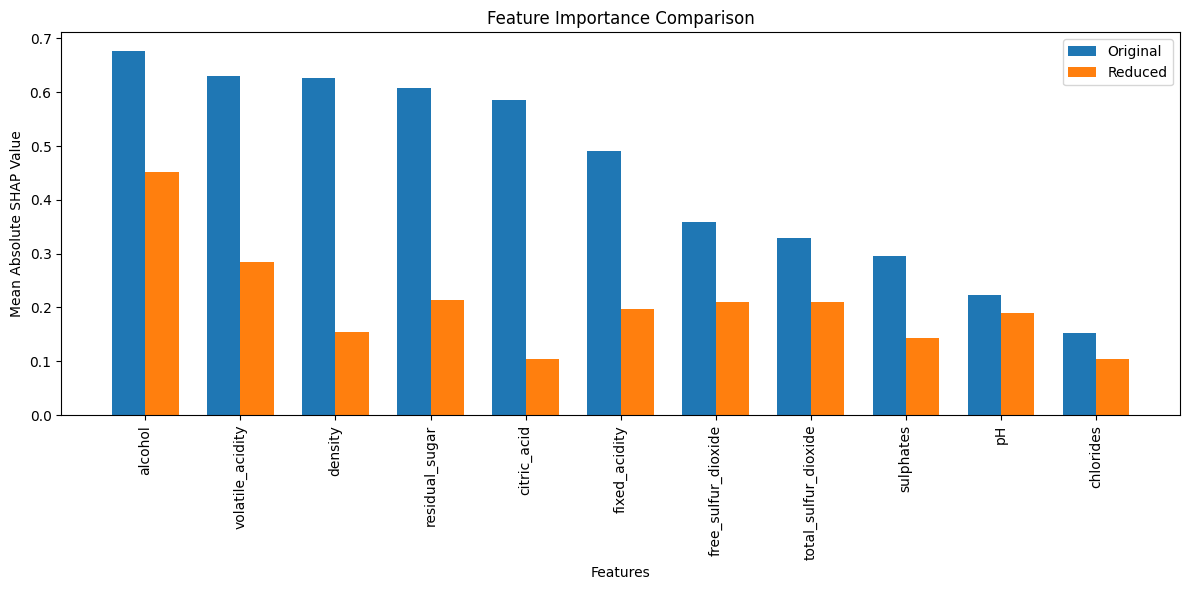

In [ ]:
# Original model feature importances
fi_original = pd.DataFrame({
    'Feature': X_train.columns,
    'SHAP Importance Original': mean_abs_shap_values_original
})

# Reduced model feature importances
fi_reduced = pd.DataFrame({
    'Feature': X_train.columns,
    'SHAP Importance Reduced': mean_abs_shap_values_reduced
})

fi_comparison = fi_original.merge(fi_reduced, on='Feature')

# Calculate the percentage change
fi_comparison['Percentage Change'] = (
    (fi_comparison['SHAP Importance Reduced'] - fi_comparison['SHAP Importance Original']) /
    fi_comparison['SHAP Importance Original']
) * 100

# Sort by original importance
fi_comparison_sorted = fi_comparison.sort_values('SHAP Importance Original', ascending=False)

# Plot
import matplotlib.pyplot as plt

x = np.arange(len(fi_comparison_sorted['Feature']))
width = 0.35

plt.figure(figsize=(12, 6))
plt.bar(x - width/2, fi_comparison_sorted['SHAP Importance Original'], width, label='Original')
plt.bar(x + width/2, fi_comparison_sorted['SHAP Importance Reduced'], width, label='Reduced')
plt.title('Feature Importance Comparison')
plt.xlabel('Features')
plt.ylabel('Mean Absolute SHAP Value')
plt.xticks(x, fi_comparison_sorted['Feature'], rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


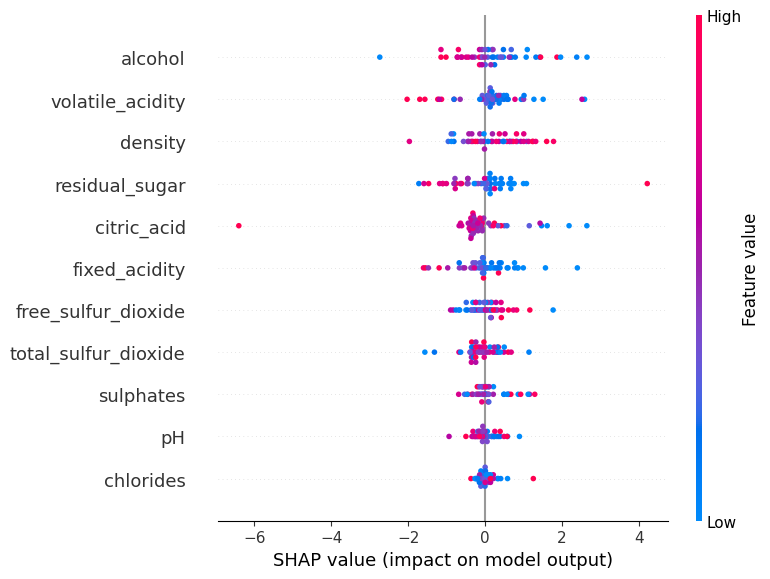

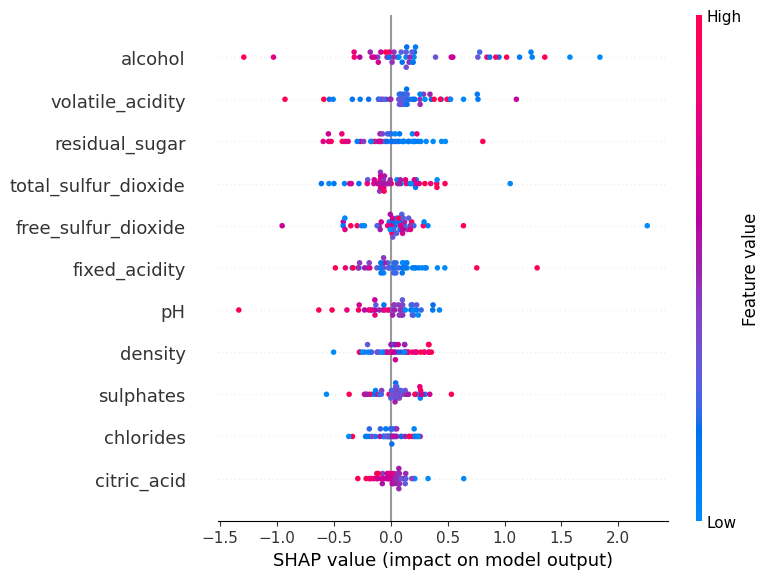

In [ ]:
shap.summary_plot(reshape_original, X_test_summary, feature_names=X_train.columns)

shap.summary_plot(reshape_reduced, X_test_summary, feature_names=X_train.columns)

---------------------------------------------------


---------------------------